In [23]:
import pandas as pd
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
df = pd.read_csv('/content/drive/MyDrive/colab_datasets/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [28]:
df.isnull().sum()

,0
label,0
text,0


In [29]:
df.duplicated().sum()

np.int64(403)

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [31]:
df.shape

(5169, 2)

In [32]:
df.value_counts('label')

,count
label,
0,4516
1,653


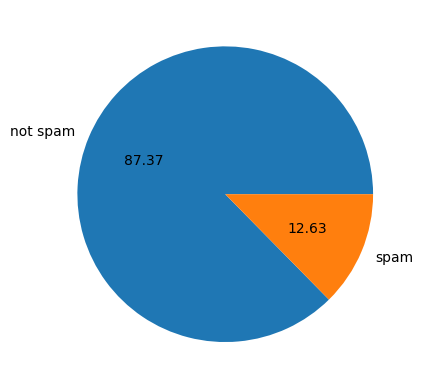

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['not spam', 'spam'], autopct='%1.2f')
plt.show()

In [34]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['characters_count'] = df['text'].apply(len)
df.head()

,label,text,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
df['words_count'] = df['text'].apply(lambda x: len(x.split()))
df.head()

,label,text,characters_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [37]:
df['sentences_count'] = df['text'].apply(lambda x: len([s for s in x.replace('?', '.').replace('!', '.').split('.') if s.strip()]))
df.head()

,label,text,characters_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [38]:
df[['characters_count', 'sentences_count', 'words_count']].describe()

,characters_count,sentences_count,words_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,2.304508,15.340685
std,58.236293,1.639932,11.068488
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,7.000000
50%,60.000000,2.000000,12.000000
75%,117.000000,3.000000,22.000000
max,910.000000,31.000000,171.000000


<Axes: >

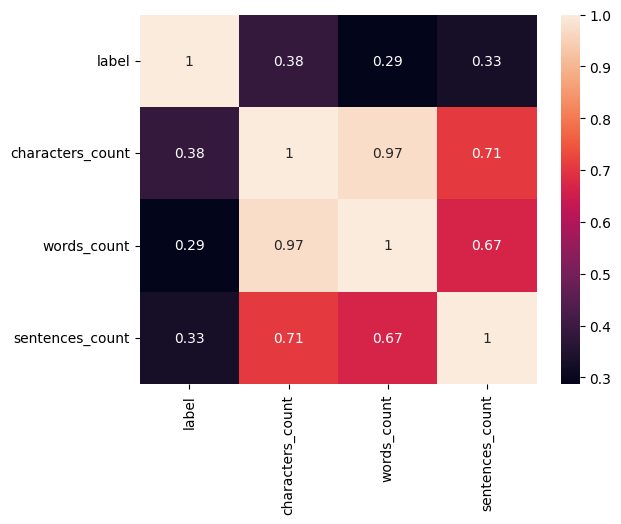

In [39]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.data.path.append('/root/nltk_data')
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = text.lower()

    y = []
    for i in text.split():
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    y = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(y)

# Тестирование
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
print(preprocess_text(text))

gonna home soon want talk stuff anymore cried enough


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [42]:
df.head()

,label,text,characters_count,words_count,sentences_count,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong available bugis n great world la e c...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joking wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say early u c already
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think go life around though


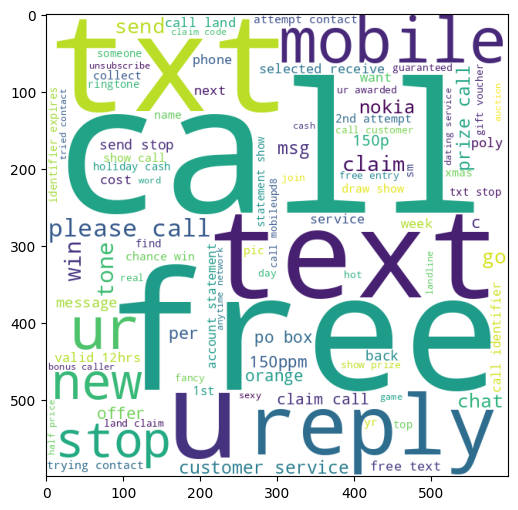

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=12,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['preprocessed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

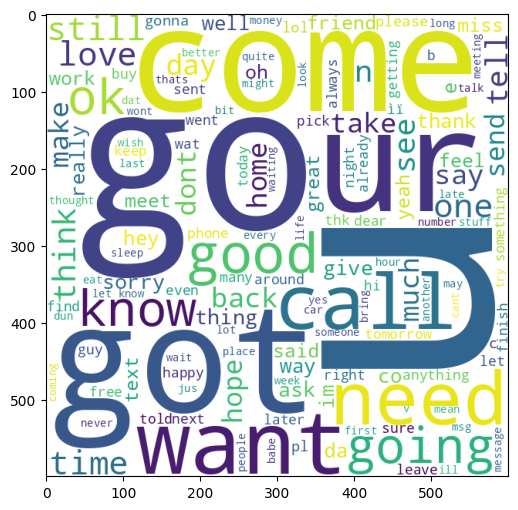

In [44]:
not_spam_wc = wc.generate(df[df['label'] == 0]['preprocessed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['preprocessed_text']).toarray()
y = df['label'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVM' : svc,
    'KNN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    return accuracy,precision,recall,f1

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For model ",name)
    print("Accuracy score - ",current_accuracy)
    print("Precision score - ",current_precision)
    print("Recall score - ", current_recall)
    print("F1 score - ", current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For model  SVM
Accuracy score -  0.9690522243713733
Precision score -  0.9274193548387096
Recall score -  0.8333333333333334
F1 score -  0.8778625954198473
For model  KNN
Accuracy score -  0.9032882011605415
Precision score -  1.0
Recall score -  0.2753623188405797
F1 score -  0.4318181818181818
For model  NB
Accuracy score -  0.9661508704061895
Precision score -  0.9904761904761905
Recall score -  0.7536231884057971
F1 score -  0.8559670781893004
For model  DT
Accuracy score -  0.937137330754352
Precision score -  0.8476190476190476
Recall score -  0.644927536231884
F1 score -  0.7325102880658436
For model  LR
Accuracy score -  0.9497098646034816
Precision score -  0.9215686274509803
Recall score -  0.6811594202898551
F1 score -  0.7833333333333333
For model  RF
Accuracy score -  0.9738878143133463
Precision score -  0.9743589743589743
Recall score -  0.8260869565217391
F1 score -  0.8941176470588236
For model  AdaBoost
Accuracy score -  0.925531914893617
Precision score -  0.87654320

In [49]:
#RF
#Accuracy score -  0.9738878143133463
#Precision score -  0.9743589743589743
#Recall score -  0.8260869565217391
#F1 score -  0.8941176470588236